# Fine-tuning your model

In [24]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

How good is a model? Example with spam classification:
- If only 1% of emails are spam and we build a classifier that predicts all emails as real, its accuracy is 99%!
- This is because of class imbalance, when one class if more frequent.
To diagnose classification predictions we use confusion matrix
- true positive --> predicted: spam email & actual: spam
- False positive --> predicted: spam & actual: real
- false negative --> predicted: real & actual: spam...

The class of interest is the positive class. Since we're trying to classify spam, those will be the positive. 
We can retrieve accuracy and other metrics from the confusion matrix:
https://en.wikipedia.org/wiki/Precision_and_recall

In [5]:
%%latex
$Accuracy = \frac{t_p + t_n}{t_p + t_n + f_p + f_n }$ 

<IPython.core.display.Latex object>

In [6]:
%%latex
$ppv = Precision = \frac{t_p}{t_p + f_p}$ 

<IPython.core.display.Latex object>

In [7]:
%%latex
$sensitiviy = hit rate = recall = \frac{t_p}{t_p + f_n}$

<IPython.core.display.Latex object>

F1 score = 2 * precision*recall / (precision+recall)

- High precision = not many real emails predicted as spam
- High recall = predicted most spam emails correctly

In [8]:
#To do stuff in scikit-learn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 8)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#to compute confusion matrix
#the true label is always the first argument
print(confusion_matrix(y_test, y_pred))

#to get relevant metrics
print(classification_report(y_test, y_pred))
#Note the column support. The support gives the number of samples of the true response that lie in that class

NameError: name 'KNeighborsClassifier' is not defined

## example using PIMA Indians diabetes set

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')

C:\Users\rodri\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rodri\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rodri\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
df.shape

(768, 9)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#check if we have missing values
np.NaN in df

False

In [14]:
x = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values
# Create training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(x_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Logistic regression and the ROC curve

Despite name, we'll use this one on classification problems, not regression ones. 

Here we will tackle binary classification (two possible labels for target).

Logistic regression outputs probabilities:
- p > 0.5 --> 1
- p < 0.5 --> 0
LogReg produces a linear decision boundary.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=42)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

C:\Users\rodri\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


By default our decision probability threshold is 0.5.

When we have a threshold of 0 all outputs are 1 and we have same rate for true positive and false positives = 1

Same result when the thresh. is equal to 1.

For intermediate values we get different points in the plot False Positive rate VS True positive rate (Also called ROC curve).

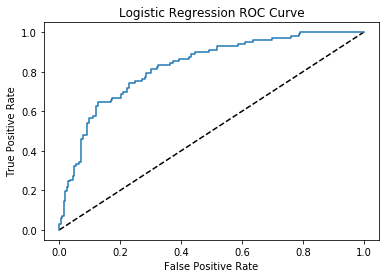

In [16]:
#To plot ROC curve
# ROC curves provide a way to visually evaluate models
from sklearn.metrics import roc_curve
#the following method returns an array with two columns. We select the second one
#That corresponds to the probability of the predicted labels being 1
y_pred_prob = logreg.predict_proba(x_test)[:,1]
#unpacking result
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#plotting result
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

Another way to visually evaluate model performance is to plot the precision VS recall curve.

Now that we have the ROC curve, which metric can we get from it?
- The larger the area under the ROC curve (AUC) the better our model is!
- The ideal case would be to have a point at (0,1) corresponding to Tpr = 1 and Fpr = 0 

In [25]:
#Computing the AUC
#In this case we'll be using logreg as our classifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=42)
logreg.fit(x_train, y_train)

#first we compute the predicted prob
y_pred_prob= logreg.predict_proba(x_test)[:,1]

roc_auc_score(y_test, y_pred_prob)

0.8266228821625738

In [26]:
#we can also compute AUC using cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, x, y, cv=5, scoring='roc_auc')

In [28]:
print(cv_scores)

[0.7987037  0.80777778 0.81962963 0.86622642 0.85037736]


AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

## Hyperparameter tuning

Hyperparameters cannot be learned by fitting the model. We have to choose them before implementing it.
- Linear reg: Choosing parameters
- Ridge/Lasso reg: alpha
- knn: choosing k
The idea will be to try a bunch of different values, fit all of them separately and see how well each performs. Then we can choose the best performing one. 

It's essential to use cross-validation, otherwise we risk overfitting the test set.

A grid search cross-validation is simply a grid with all combinations of parameter values we're gonna try. 

In [33]:
from sklearn.model_selection import GridSearchCV
#we now specify the hyperparameter in dictionary form
#We can see the names of the hyperp in the documentation of each model
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(x,y)

#now to check which one performed best
knn_cv.best_params_

{'n_neighbors': 14}

In [34]:
#And what was the best score
knn_cv.best_score_

0.7578125

### Practice on logreg
Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

The hyperparameter space for C has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

In [ ]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


### Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

As before, the feature array X and target variable array y of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use RandomizedSearchCV to find the optimal hyperparameters. Go for it!

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

### Hold-out set for final evaluation
How well can the model perform on never before seen data? Using all data for cv is not idea since we wouldn't be sure that on the selected test that test data was not used. 

We'll split data into training and hold-out set at the beginning and perform grid search cv on training set

After that we can choose the best hyperparameters and evaluate on hold-out set, why has not been used at all.

### Hold-out set in practice I: Classification
You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


### Hold-out set in practice II: Regression
Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

a∗L1+b∗L2
In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [ ]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

### Regression with categorical features
Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array X and target variable array y have been pre-loaded.


In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)
